In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
from yellowbrick.regressor import AlphaSelection
from yellowbrick.model_selection import FeatureImportances
from yellowbrick.features import RadViz

In [2]:
df = pd.read_csv("AMES_Final_DF.csv")

In [30]:
df.shape

(2925, 274)

In [3]:
df.head()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,141.0,31770,6,5,1960,1960,112.0,639.0,0.0,441.0,...,0,0,0,0,1,0,0,0,1,0
1,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,270.0,...,0,0,0,0,1,0,0,0,1,0
2,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,406.0,...,0,0,0,0,1,0,0,0,1,0
3,93.0,11160,7,5,1968,1968,0.0,1065.0,0.0,1045.0,...,0,0,0,0,1,0,0,0,1,0
4,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,137.0,...,0,0,0,0,1,0,0,0,1,0


In [6]:
list(df.columns)

['Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice',
 'MS SubClass_150',
 'MS SubClass_160',
 'MS SubClass_180',
 'MS SubClass_190',
 'MS SubClass_20',
 'MS SubClass_30',
 'MS SubClass_40',
 'MS SubClass_45',
 'MS SubClass_50',
 'MS SubClass_60',
 'MS SubClass_70',
 'MS SubClass_75',
 'MS SubClass_80',
 'MS SubClass_85',
 'MS SubClass_90',
 'MS Zoning_C (all)',
 'MS Zoning_FV',
 'MS Zoning_I (all)',
 'MS Zoning_RH',
 'MS Zoning_RL',
 'MS Zoning_RM',
 'Street_Pave'

In [7]:
scaler = StandardScaler()

In [8]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [10]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [12]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n", "mae:", mae, "\n", "mse:", mse, "\n",
                 "rmse:", rmse)

In [31]:
lasso_model = Lasso(max_iter=100000)

In [32]:
lasso_model.fit(scaled_X_train, y_train)

Lasso(max_iter=100000)

In [33]:
y_pred = lasso_model.predict(scaled_X_test)

In [34]:
eval_metrics(y_test, y_pred)

r2_score: 0.9169431989298119 
 mae: 14702.24680030985 
 mse: 495364082.2476377 
 rmse: 22256.776097351514


In [35]:
cv_scores = cross_val_score(estimator=lasso_model, X=scaled_X_train, y=y_train, cv=10)

In [36]:
cv_scores.mean()

0.9180258720535323

In [37]:
cv_scores_neg_mean = cross_val_score(estimator=lasso_model, X=scaled_X_train,
                                     y=y_train, scoring="neg_mean_squared_error",
                                     cv=10)

In [40]:
-cv_scores_neg_mean.mean()

531078629.98399365

In [41]:
np.sqrt(-cv_scores_neg_mean.mean())

23045.143305781236

In [42]:
alpha_values = np.linspace(0.1, 20, 50)

In [44]:
lasso_cv_model = LassoCV(alphas=alpha_values, cv=5, max_iter=100000).fit(scaled_X_train, y_train)

In [45]:
lasso_cv_model.alpha_

20.0

In [46]:
alpha_space = range(1, 500)

In [47]:
lasso_cv_model_new = LassoCV(alphas=alpha_space, cv=5, max_iter=100000).fit(scaled_X_train, y_train)

In [48]:
lasso_cv_model_new.alpha_

213

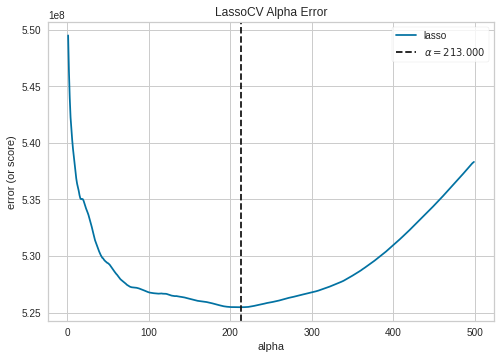

<AxesSubplot:title={'center':'LassoCV Alpha Error'}, xlabel='alpha', ylabel='error (or score)'>

In [50]:
model_yellowbrick = LassoCV(alphas=alpha_space, max_iter=100000)
visualizer = AlphaSelection(model_yellowbrick)
visualizer.fit(scaled_X_train, y_train)
visualizer.show()

In [51]:
# Let's try our model with the best possible alpha value.

lasso_model_ideal = Lasso(213, max_iter=100000).fit(scaled_X_train, y_train)
y_pred_ideal = lasso_model_ideal.predict(scaled_X_test)

In [52]:
eval_metrics(y_test, y_pred_ideal)

r2_score: 0.9172336276905467 
 mae: 14563.288791576031 
 mse: 493631918.5395968 
 rmse: 22217.828843962157


In [54]:
labels = list(map(lambda s: s.title(), X.columns))

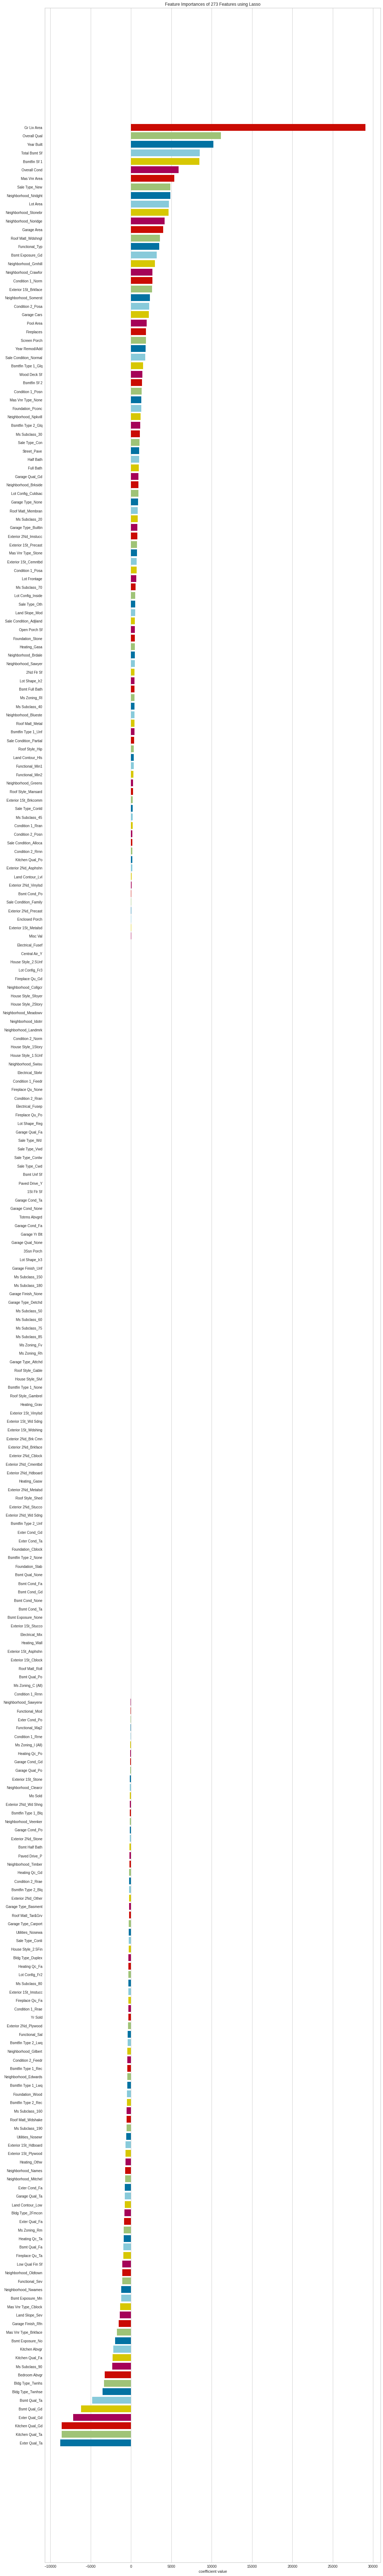

<AxesSubplot:title={'center':'Feature Importances of 273 Features using Lasso'}, xlabel='coefficient value'>

In [57]:
viz = FeatureImportances(lasso_model_ideal, labels=labels, relative=False)
visualizer = RadViz(size=(1080, 7200))

viz.fit(scaled_X_train, y_train)
viz.show()

In [58]:
feature_coef = pd.DataFrame({"features": X.columns, "coef": lasso_model_ideal.coef_})
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

188

In [59]:
X_new = X[significant_features.features]

In [60]:
X_new.shape

(2925, 188)

In [61]:
# Linear Regression with Reduced Columns

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=0)

In [63]:
lm = LinearRegression()

In [64]:
lm.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = lm.predict(X_test)

In [66]:
eval_metrics(y_test, y_pred)

r2_score: 0.9250720783054915 
 mae: 14758.67631738579 
 mse: 461117437.3953657 
 rmse: 21473.64518183547


In [67]:
# Linear Regression with original columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [68]:
lm = LinearRegression()

In [69]:
lm.fit(X_train, y_train)

LinearRegression()

In [70]:
y_pred = lm.predict(X_test)

In [71]:
eval_metrics(y_test, y_pred)

r2_score: 0.913202106116381 
 mae: 15745.198488637569 
 mse: 534166990.00557923 
 rmse: 23112.052916294113
